# General

- Include the notebook AND a pdf of the notebook as part of your homework. 
- label this as HW2\Ryslik_1_Coding.pdf

# Part 1 - PCA

- Load the IRIS data set on flowers (we do that for you).
- Write a function that takes in a matrix and provides you the eigenvalues and eigenvectors (using numpy).
- Project your centered data into two dimensional space and plot the projected points. Color code the points by flower type. 
- Show that you get the same eigenvalues/eigenvectors/projection if you use scikit's PCA or you manually do the projection via numpy (you can use numpy to compute the eigenvectors and eigenvalues)
- Can you make a good rule of what type of flower it is by just using the first two principle components? Describe how?
- What percentage of the total data variance do the first two principle components capture.

In [45]:
# Data prep
import numpy as np
from sklearn.datasets import load_iris

iris = load_iris() #see the documentation here: https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [47]:
# Display iris data such that my brain actually likes it.
iris = load_iris(as_frame=True)
iris.data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [44]:
# Write a function that takes in a matrix and provides you the eigenvalues and eigenvectors, using numpy.
iris_matrix = 0
def get_eigen_manual(data):
    rows, cols = data.shape
    iris_mean_vals = data.mean(axis=1).reshape(-1,1)
    temp_mat = data - iris_mean_vals
    iris_matrix = np.dot(temp_mat, temp_mat.T)/cols
    return np.linalg.eig(iris_matrix)
# Get the calculated data.
vals, vectors = get_eigen_manual(iris.data)

array([ 4.19634596e+02+0.00000000e+00j,  7.27785591e+01+0.00000000e+00j,
        1.12496958e+00+0.00000000e+00j,  1.52068975e-14+2.94873695e-15j,
        1.52068975e-14-2.94873695e-15j,  3.85337709e-15+1.43111818e-14j,
        3.85337709e-15-1.43111818e-14j, -1.40071566e-14+7.24498669e-16j,
       -1.40071566e-14-7.24498669e-16j, -7.26704530e-15+1.07554813e-14j,
       -7.26704530e-15-1.07554813e-14j, -1.19543326e-14+3.43827354e-15j,
       -1.19543326e-14-3.43827354e-15j, -3.19417758e-15+1.21219874e-14j,
       -3.19417758e-15-1.21219874e-14j,  8.62749300e-15+9.46358724e-15j,
        8.62749300e-15-9.46358724e-15j,  1.12758839e-14+6.26172308e-15j,
        1.12758839e-14-6.26172308e-15j,  1.16740735e-14+4.59061951e-15j,
        1.16740735e-14-4.59061951e-15j, -8.81557521e-16+1.18771247e-14j,
       -8.81557521e-16-1.18771247e-14j,  5.62377981e-15+9.20133002e-15j,
        5.62377981e-15-9.20133002e-15j, -1.09675562e-14+0.00000000e+00j,
       -6.87487788e-15+8.17566412e-15j, -6.87487788

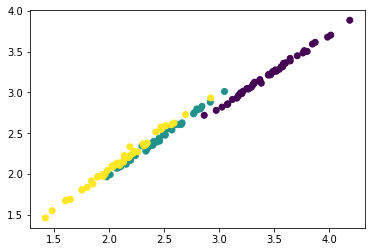

In [60]:
# Project your centered data into two dimensional space and plot the projected points. Color code the points by flower type.
from matplotlib import pyplot as plt
plt.scatter(iris_matrix[0,:], iris_matrix[1,:], c=iris.target)

In [ ]:
# Show that you get the same eigenvalues/eigenvectors/projection if you use scikit's PCA or you manually do the projection via numpy (you can use numpy to compute the eigenvectors and eigenvalues)

In [ ]:
# Can you make a good rule of what type of flower it is by just using the first two principle components? Describe how?

In [ ]:
# What percentage of the total data variance do the first two principle components capture.

# Part 2 - Linear Regression

- Load the Diabetes dataset (we do that for you)
- Break the data set up into the first 350 observations for training and the remaining observations for test.
- Write a function that takes in a feature matrix and a y-vector and fits the line of best fit using least squares regression. 
- Fit the line of best fit on the training data. 
- Make a prediction on the test data. 
- Compute the total Sum of Squared Error (SSE) and then compute the MSE on the test data.
- Fit the linear regression model using the stats models package as in class.
- Which variables are statistically significant at the 5% level? 
- What is the value of R^2? How is that interpreted?

In [1]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [2]:
diabetes['target']

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [3]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']